In [2]:
# menghubungkan colab dengan google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# memanggil data set lewat gdrive
path = "/content/drive/MyDrive/IR/data"

In [4]:
# Membaca File kompas.xml
import pandas as pd

df = pd.read_xml(path + "/kompas.xml")
df.head()

,sumber,tanggal,kategori,judul,isi,link,jumlahkata
0,kompas.com,2015/07/01,Teknologi,"Ponsel Huawei Honor 4C Dibanderol Rp 2,2 Juta","JAKARTA, KOMPAS.com Ponsel Android Huawei Hon...",http://tekno.kompas.com/read/xml/2015/07/01/18...,315
1,kompas.com,2015/07/01,Teknologi,Asosiasi: RPP E-commerce Tidak Sesuai Hasil Di...,"JAKARTA, KOMPAS.com - Sejak 2013, wacana tenta...",http://tekno.kompas.com/read/xml/2015/07/01/16...,419
2,kompas.com,2015/07/01,Teknologi,"Pemesan ""iPhone Jadi Sabun"" Karyawan Pesaing L...","JAKARTA, KOMPAS.com Danis Darusman, pelanggan ...",http://tekno.kompas.com/read/xml/2015/07/01/15...,265
3,kompas.com,2015/07/01,Teknologi,"""Autofeather Failure"", Momok bagi Pesawat Bali...",KOMPAS.com Salah satu momok yang dihadapi dala...,http://tekno.kompas.com/read/xml/2015/07/01/14...,481
4,kompas.com,2015/07/01,Teknologi,Laptop Bezel Tertipis di Dunia Masuk Indonesia,"JAKARTA, KOMPAS.com - Resmi diperkenalkan pada...",http://tekno.kompas.com/read/xml/2015/07/01/14...,227


In [5]:
# Mencari Informasi Data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1502 entries, 0 to 1501
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   sumber      1502 non-null   object
 1   tanggal     1502 non-null   object
 2   kategori    1502 non-null   object
 3   judul       1502 non-null   object
 4   isi         1502 non-null   object
 5   link        1502 non-null   object
 6   jumlahkata  1502 non-null   int64 
dtypes: int64(1), object(6)
memory usage: 82.3+ KB


In [6]:
# Memeriksa nilai NaN dan Duplikat
df.isnull().sum()

,0
sumber,0
tanggal,0
kategori,0
judul,0
isi,0
link,0
jumlahkata,0


In [7]:
df.duplicated().sum()

np.int64(0)

In [8]:
# Case Folding
def caseFolding(text):
    text = text.lower()
    return text

contoh ="Terima kasih, kak! Kamu sangat baik sekali kepadaku hari ini."
print(f'Original Text: {contoh}')
print(f'case Folding Text: {caseFolding(contoh)}')

Original Text: Terima kasih, kak! Kamu sangat baik sekali kepadaku hari ini.
case Folding Text: terima kasih, kak! kamu sangat baik sekali kepadaku hari ini.


In [9]:
# Punctuation Removal
import re

def punctuationRemoval(text):
    text = re.sub(r'[^\w\s]', '', text)
    return text

contoh = "Terima kasih, kak! Kamu sangat baik sekali kepadaku hari ini."
print(f'Original Text: {contoh}')
print(f'Punctuation Removal Text: {punctuationRemoval(contoh)}')

Original Text: Terima kasih, kak! Kamu sangat baik sekali kepadaku hari ini.
Punctuation Removal Text: Terima kasih kak Kamu sangat baik sekali kepadaku hari ini


In [10]:
# Menerapkan Function
df['clean'] = df['isi'].apply(caseFolding)
df['clean'] = df['clean'].apply(punctuationRemoval)
df.head()

,sumber,tanggal,kategori,judul,isi,link,jumlahkata,clean
0,kompas.com,2015/07/01,Teknologi,"Ponsel Huawei Honor 4C Dibanderol Rp 2,2 Juta","JAKARTA, KOMPAS.com Ponsel Android Huawei Hon...",http://tekno.kompas.com/read/xml/2015/07/01/18...,315,jakarta kompascom ponsel android huawei honor...
1,kompas.com,2015/07/01,Teknologi,Asosiasi: RPP E-commerce Tidak Sesuai Hasil Di...,"JAKARTA, KOMPAS.com - Sejak 2013, wacana tenta...",http://tekno.kompas.com/read/xml/2015/07/01/16...,419,jakarta kompascom sejak 2013 wacana tentang r...
2,kompas.com,2015/07/01,Teknologi,"Pemesan ""iPhone Jadi Sabun"" Karyawan Pesaing L...","JAKARTA, KOMPAS.com Danis Darusman, pelanggan ...",http://tekno.kompas.com/read/xml/2015/07/01/15...,265,jakarta kompascom danis darusman pelanggan laz...
3,kompas.com,2015/07/01,Teknologi,"""Autofeather Failure"", Momok bagi Pesawat Bali...",KOMPAS.com Salah satu momok yang dihadapi dala...,http://tekno.kompas.com/read/xml/2015/07/01/14...,481,kompascom salah satu momok yang dihadapi dalam...
4,kompas.com,2015/07/01,Teknologi,Laptop Bezel Tertipis di Dunia Masuk Indonesia,"JAKARTA, KOMPAS.com - Resmi diperkenalkan pada...",http://tekno.kompas.com/read/xml/2015/07/01/14...,227,jakarta kompascom resmi diperkenalkan pada aj...


In [11]:
# Membuat Function Tokenisasi
def tokenize(text):
    return text.split(" ")

contoh = "terima kasih kak kamu sangat baik sekali kepadaku hari ini"
print(f'Original Text: {contoh}')

clean = caseFolding(contoh)
clean = punctuationRemoval(clean)
print(f'Tokenized: {tokenize(clean)}')

Original Text: terima kasih kak kamu sangat baik sekali kepadaku hari ini
Tokenized: ['terima', 'kasih', 'kak', 'kamu', 'sangat', 'baik', 'sekali', 'kepadaku', 'hari', 'ini']


In [12]:
# Menerapkan Function
df['tokens'] = df['clean'].apply(tokenize)
df.head()

,sumber,tanggal,kategori,judul,isi,link,jumlahkata,clean,tokens
0,kompas.com,2015/07/01,Teknologi,"Ponsel Huawei Honor 4C Dibanderol Rp 2,2 Juta","JAKARTA, KOMPAS.com Ponsel Android Huawei Hon...",http://tekno.kompas.com/read/xml/2015/07/01/18...,315,jakarta kompascom ponsel android huawei honor...,"[jakarta, kompascom, , ponsel, android, huawei..."
1,kompas.com,2015/07/01,Teknologi,Asosiasi: RPP E-commerce Tidak Sesuai Hasil Di...,"JAKARTA, KOMPAS.com - Sejak 2013, wacana tenta...",http://tekno.kompas.com/read/xml/2015/07/01/16...,419,jakarta kompascom sejak 2013 wacana tentang r...,"[jakarta, kompascom, , sejak, 2013, wacana, te..."
2,kompas.com,2015/07/01,Teknologi,"Pemesan ""iPhone Jadi Sabun"" Karyawan Pesaing L...","JAKARTA, KOMPAS.com Danis Darusman, pelanggan ...",http://tekno.kompas.com/read/xml/2015/07/01/15...,265,jakarta kompascom danis darusman pelanggan laz...,"[jakarta, kompascom, danis, darusman, pelangga..."
3,kompas.com,2015/07/01,Teknologi,"""Autofeather Failure"", Momok bagi Pesawat Bali...",KOMPAS.com Salah satu momok yang dihadapi dala...,http://tekno.kompas.com/read/xml/2015/07/01/14...,481,kompascom salah satu momok yang dihadapi dalam...,"[kompascom, salah, satu, momok, yang, dihadapi..."
4,kompas.com,2015/07/01,Teknologi,Laptop Bezel Tertipis di Dunia Masuk Indonesia,"JAKARTA, KOMPAS.com - Resmi diperkenalkan pada...",http://tekno.kompas.com/read/xml/2015/07/01/14...,227,jakarta kompascom resmi diperkenalkan pada aj...,"[jakarta, kompascom, , resmi, diperkenalkan, p..."


In [13]:
# Frekuensi Kata
from collections import Counter

all_token = []

for tokens in df['tokens']:
    if isinstance(tokens, list):
        for token in tokens:
            token = str(token).strip()
            if token:
                all_token.append(token)

# Hitung Frekuensi
term_freq = Counter(all_token)

# Buat dataframe
term_freq_df = pd.DataFrame(term_freq.items(), columns=['term', 'freq'])

# Sorting/Urutkan dari tertinggi
term_freq_df_sorted = term_freq_df.sort_values(by='freq', ascending=False, ignore_index=True)

term_freq_df_sorted.head(10)

,term,freq
0,yang,6450
1,di,5824
2,dan,4915
3,ini,2744
4,dengan,2625
5,untuk,2583
6,dari,2460
7,itu,2437
8,akan,2055
9,dalam,1743


In [14]:
# Urutkan dari frekuensi kecil ke besar
term_freq_df_sorted = term_freq_df.sort_values(by='freq', ascending=True, ignore_index=True)

# Hitung rank ulang berdasarkan urutan baru
term_freq_df_sorted['rank'] = range(1, len(term_freq_df_sorted) + 1)

# Lihat 10 data teratas
term_freq_df_sorted.head(10)

,term,freq,rank
0,batunya,1,1
1,salome,1,2
2,kesehariannya,1,3
3,antero,1,4
4,permata,1,5
5,booming,1,6
6,tribunnewsreynas,1,7
7,reynas,1,8
8,tribunnews,1,9
9,nyengat,1,10


In [15]:
# Rank
term_freq_df_sorted['rank'] = term_freq_df_sorted['freq'].rank(method='first', ascending=False).astype(int)
term_freq_df_sorted.head()

,term,freq,rank
0,batunya,1,12216
1,salome,1,12217
2,kesehariannya,1,12218
3,antero,1,12219
4,permata,1,12220


In [16]:
# Mengurutkan Berdasarkan Rank
tf_df = term_freq_df_sorted.copy()
tf_df.rename(columns={'freq': 'Freq (ft, d)'}, inplace=True)

tf_df['Rank'] = tf_df['Freq (ft, d)'].rank(method='first', ascending=False).astype(int)

tf_sorted_rank = tf_df.sort_values(by='Rank', ascending=True)
tf_sorted_rank.head(20)

,term,"Freq (ft, d)",rank,Rank
24854,yang,6450,1,1
24853,di,5824,2,2
24852,dan,4915,3,3
24851,ini,2744,4,4
24850,dengan,2625,5,5
24849,untuk,2583,6,6
24848,dari,2460,7,7
24847,itu,2437,8,8
24846,akan,2055,9,9
24845,dalam,1743,10,10


In [17]:
# Zip Flaw
term_freq_df_sorted['k = f * r'] = term_freq_df_sorted['freq'] * term_freq_df_sorted['rank']
term_freq_df_sorted.head(100)

,term,freq,rank,k = f * r
0,batunya,1,12216,12216
1,salome,1,12217,12217
2,kesehariannya,1,12218,12218
3,antero,1,12219,12219
4,permata,1,12220,12220
...,...,...,...,...
95,magnificent,1,12311,12311
96,memikul,1,12312,12312
97,menjajakan,1,12313,12313
98,lampau,1,12314,12314


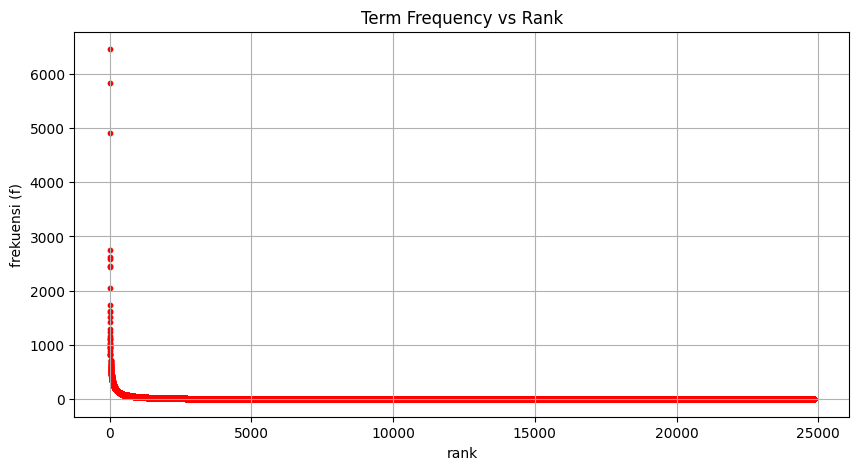

In [18]:
# Term Frequency & Penerapan Zipf’s Law
import matplotlib.pyplot as plt

rank = term_freq_df_sorted['rank']
freq = term_freq_df_sorted['freq']
plt.figure(figsize=(10, 5))
plt.scatter(rank, freq, color='red', s=10)
plt.title("Term Frequency vs Rank")
plt.xlabel("rank")
plt.ylabel("frekuensi (f)")

plt.grid(True)
plt.show()